# We are going to compare our LLM model with RFC, SVM, ANN, Bagging Classifier

### Import Libraries


In [19]:
pip install numpy scikit-learn tensorflow


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



### Import Datasets

In [21]:
#loading the dataset to df
df = pd.read_csv(r"fraudTest.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

### Data Preprocessing

#### --Label Encoder


In [22]:
cat_features = ["trans_date_trans_time", "merchant", "category", "first", "last", "gender", "street", "city", "state", "job", "dob", "trans_num"]

le = LabelEncoder()

for feature in cat_features:
  label = le.fit_transform(df[feature])
  df.drop(feature, axis = 1, inplace = True)
  df[feature] = label

df.head(5)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category,first,last,gender,street,city,state,job,dob,trans_num
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,...,10,151,115,1,341,157,39,275,376,98699
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,...,10,163,457,0,354,16,43,392,760,108785
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,...,5,24,249,0,865,61,33,259,421,433979
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,...,9,42,457,1,320,764,8,407,718,71993
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,...,13,247,261,1,548,247,21,196,177,190585


#### --Before SMOTE

In [23]:
print(f"Class distributiom before SMOTE:", df['is_fraud'].value_counts())

Class distributiom before SMOTE: is_fraud
0    553574
1      2145
Name: count, dtype: int64


#### --After SMOTE

In [24]:
X = df.drop(['is_fraud'], axis=1)
y = df.is_fraud

smote = SMOTE(random_state = 1231)
X_res, y_res = smote.fit_resample(X,y)

df_resampled = pd.DataFrame(X_res, columns = df.columns.drop('is_fraud'))
df_resampled['is_fraud'] = y_res

print("Resampled class distribution after SMOTE:", df_resampled['is_fraud'].value_counts())

Resampled class distribution after SMOTE: is_fraud
0    553574
1    553574
Name: count, dtype: int64


#### --Train/Test Split

In [25]:
# Perform a 70/15/15 Split
# Split the dataset into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(df_resampled.drop('is_fraud', axis=1), df_resampled['is_fraud'], test_size=0.3, random_state=1231)

# Split the temp dataset into validation (15% of total) and test (remaining 15% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1231)

print('Rows in Train data : ', X_train.shape[0])
print('Rows in Test data : ',X_test.shape[0])
print('Rows in val data : ',X_val.shape[0])

Rows in Train data :  775003
Rows in Test data :  166073
Rows in val data :  166072


### Feature Selection

In [ ]:
#Comparing models: Random Forest

### LLM Integration

### Other Models: RFC, SVM, ANN, Bagging Classifier

##### -- Random Forest Classifier

In [26]:
rfc = rfc = RandomForestClassifier(n_estimators = 150, random_state = 1231)

##### -- Support Vector Machine (SVM)

In [27]:
svm = SVC(random_state = 1231)

##### -- Artificial Neural Network (ANN)

In [28]:
ann = MLPClassifier(random_state = 1231)

##### -- Bagging Classifier

In [29]:
bagging = BaggingClassifier(n_estimators = 50, random_state = 1231)

#### --Undersampling Just for Showing the Models are able to function without error

In [30]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming your dataset is already loaded as df
X2 = df.drop('is_fraud', axis=1)
y2 = df['is_fraud'] 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 1231)

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state = 1231)
X2_res, y2_res = rus.fit_resample(X2_train, y2_train)

# Show the class distribution after undersampling
print("Class distribution after undersampling:", pd.Series(y2_res).value_counts())

Class distribution after undersampling: is_fraud
0    1740
1    1740
Name: count, dtype: int64


#### Confusion Matrix for each Models (Undersampling ver)

F1 Score of Random Forest: 0.7375


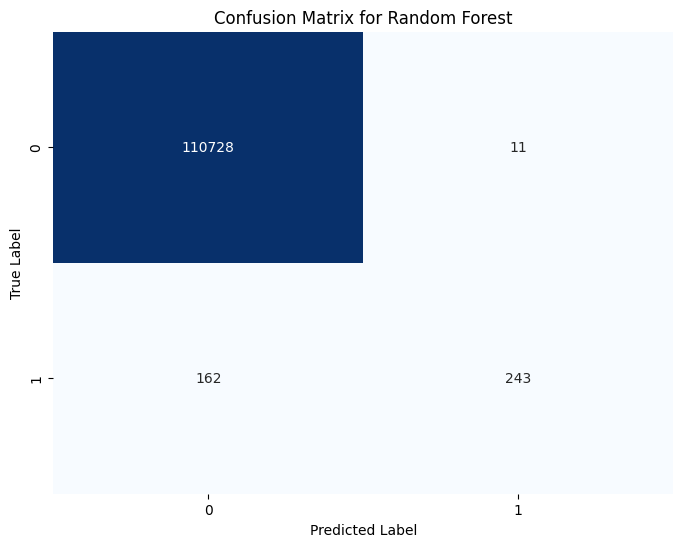

F1 Score of SVM: 0.0000


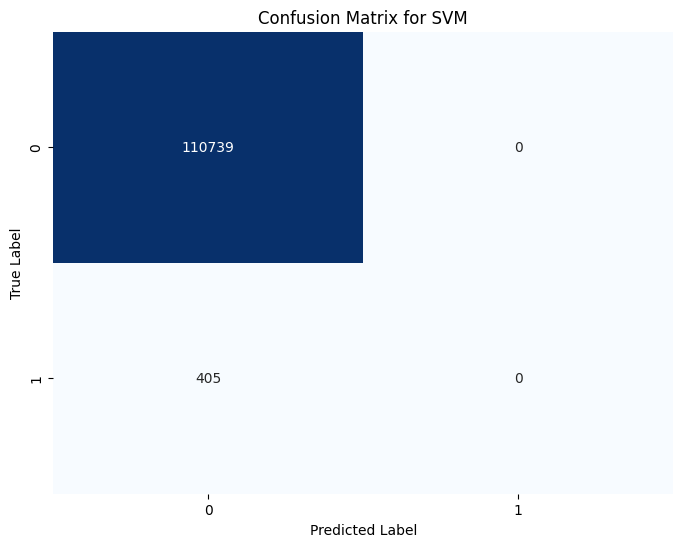

F1 Score of ANN: 0.0000


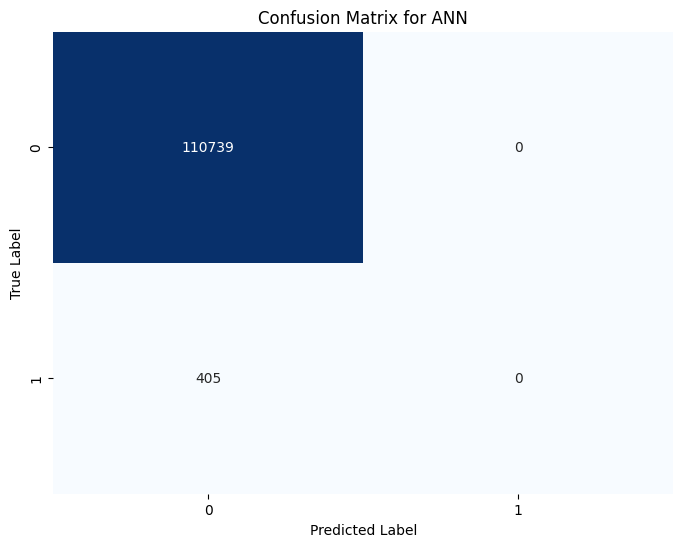

F1 Score of Bagging: 0.7107


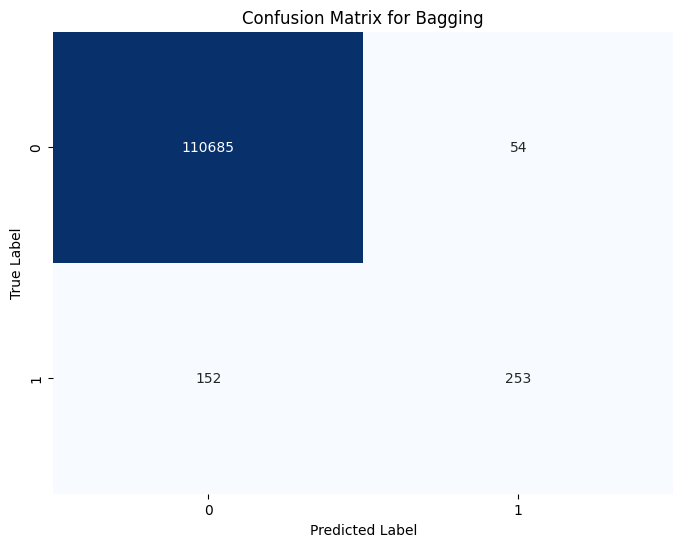

In [32]:
models = {'Random Forest': rfc, 'SVM': svm, 'ANN': ann, 'Bagging': bagging}
f1_scores = {}

# Train and evaluate the models, generating confusion matrices
for name, model in models.items():
    model.fit(X2_train, y2_train)  # Train model
    y2_pred = model.predict(X2_test)  # Predict on testing set

    # Print F1 Score
    f1 = f1_score(y2_test, y2_pred)
    f1_scores[name] = f1
    print(f"F1 Score of {name}: {f1:.4f}")
    
    # Plotting the confusion matrix
    cm = confusion_matrix(y2_test, y2_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

##### --print the confusion matrix numerically

In [15]:
print(f"Confusion Matrix for {name}:")
print(cm)
print("\n")

Confusion Matrix for Bagging:
[[110685     54]
 [   152    253]]




#### Confusion Matrix for each Models

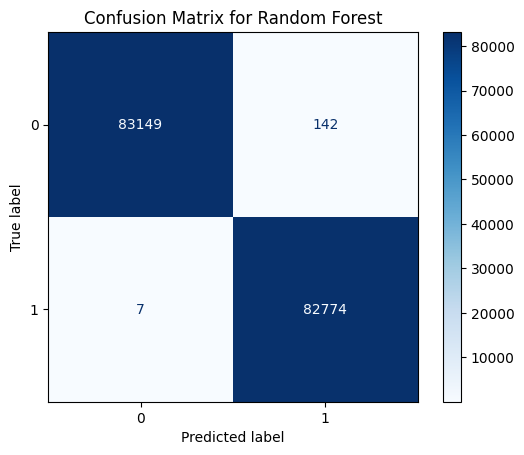

In [26]:
models = {'Random Forest': rfc, 'SVM': svm, 'ANN': ann, 'Bagging': bagging}

# Train and evaluate the models, generating confusion matrices
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_val)  # Predict on validation set
    
    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plotting the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()